<a href="https://colab.research.google.com/github/aapolaivm/Google-Colab-algorithms/blob/main/Convolution_activationfunction_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1



In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [2]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

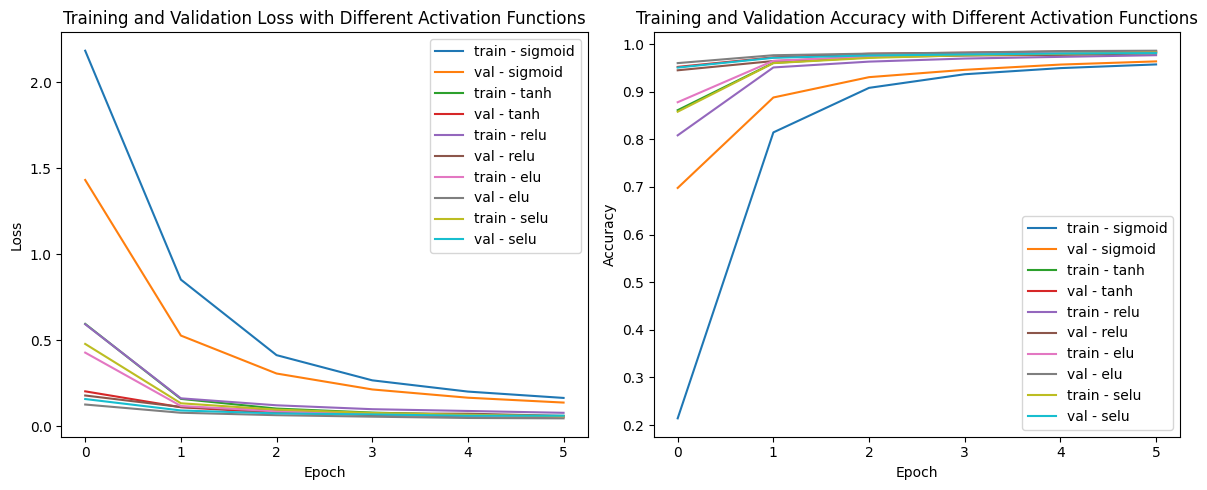

In [3]:
# Defining different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

# Creating a function to build and compile models
def build_model(activation):
    model = tf.keras.models.Sequential([
        Conv2D(8, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation=activation),
        Flatten(),
        Dense(16, activation=activation),
        Dense(10)  # Output layer
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

plt.figure(figsize=(12, 5))
for activation in activation_functions:
    model = build_model(activation)
    history = model.fit(
        ds_train,
        epochs=6,
        validation_data=ds_test,
        verbose=0  # Setting verbose to 0 to suppress training output
    )

    # Plotting training and validation loss for each activation function
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train - ' + activation)
    plt.plot(history.history['val_loss'], label='val - ' + activation)
    plt.title('Training and Validation Loss with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy for each activation function
    plt.subplot(1, 2, 2)
    plt.plot(history.history['sparse_categorical_accuracy'], label='train - ' + activation)
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='val - ' + activation)
    plt.title('Training and Validation Accuracy with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete7LAFVW/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete7LAFVW/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [5]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

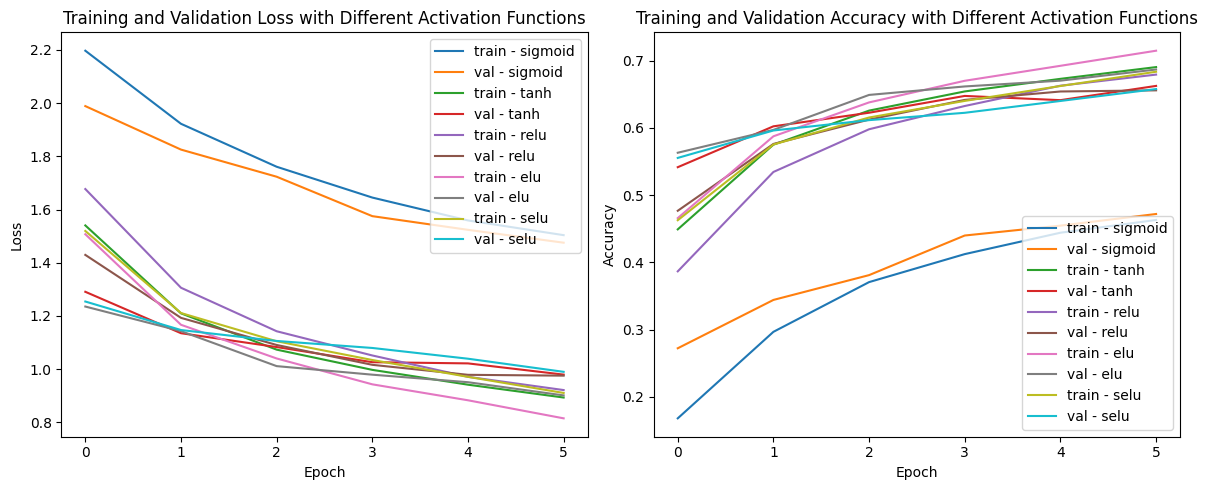

In [6]:
# Defining different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

# Creating a function to build and compile models
def build_model(activation):
    model = tf.keras.models.Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        Flatten(),
        Dense(64, activation=activation),
        Dense(10)  # Output layer
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

plt.figure(figsize=(12, 5))
for activation in activation_functions:
    model = build_model(activation)
    history = model.fit(
        ds_train,
        epochs=6,
        validation_data=ds_test,
        verbose=0  # Setting verbose to 0 to suppress training output
    )

    # Plotting training and validation loss for each activation function
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train - ' + activation)
    plt.plot(history.history['val_loss'], label='val - ' + activation)
    plt.title('Training and Validation Loss with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy for each activation function
    plt.subplot(1, 2, 2)
    plt.plot(history.history['sparse_categorical_accuracy'], label='train - ' + activation)
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='val - ' + activation)
    plt.title('Training and Validation Accuracy with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()